2022-05-01 19:26:13,953 Downloading LFW metadata: https://ndownloader.figshare.com/files/5976012


Automatically created module for IPython interactive environment


2022-05-01 19:26:14,239 Downloading LFW metadata: https://ndownloader.figshare.com/files/5976009
2022-05-01 19:26:14,473 Downloading LFW metadata: https://ndownloader.figshare.com/files/5976006
2022-05-01 19:26:14,752 Downloading LFW data (~200MB): https://ndownloader.figshare.com/files/5976015


Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7
Extracting the top 150 eigenfaces from 966 faces
done in 0.598s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.044s
Fitting the classifier to the training set
done in 30.167s
Best estimator found by grid search:
SVC(C=1000.0, class_weight='balanced', gamma=0.005)
Predicting people's names on the test set
done in 0.047s
                   precision    recall  f1-score   support

     Ariel Sharon       0.88      0.54      0.67        13
     Colin Powell       0.79      0.87      0.83        60
  Donald Rumsfeld       0.90      0.67      0.77        27
    George W Bush       0.84      0.98      0.91       146
Gerhard Schroeder       0.95      0.80      0.87        25
      Hugo Chavez       1.00      0.47      0.64        15
       Tony Blair       0.97      0.81      0.88        36

         accuracy                           0.86       322
        macro avg       0.90      0.73      0.79       

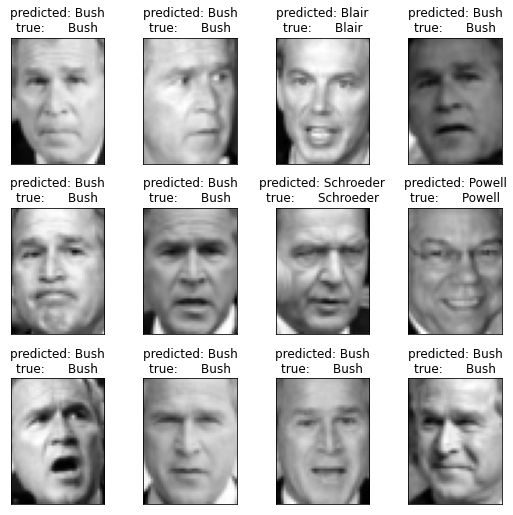

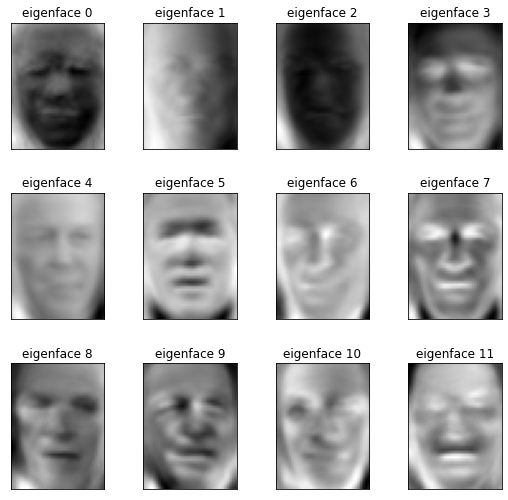

In [1]:
from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC


print(__doc__)

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')


# #############################################################################
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)


# #############################################################################
# Split into a training set and a test set using a stratified k fold

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)


# #############################################################################
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 150

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))


# #############################################################################
# Train a SVM classification model

print("Fitting the classifier to the training set")
t0 = time()
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(
    SVC(kernel='rbf', class_weight='balanced'), param_grid
)
clf = clf.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)


# #############################################################################
# Quantitative evaluation of the model quality on the test set

print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))


# #############################################################################
# Qualitative evaluation of the predictions using matplotlib

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

# plot the gallery of the most significative eigenfaces

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

## Random Forest Classifier

In [2]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6801242236024845


In [3]:
print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

                   precision    recall  f1-score   support

     Ariel Sharon       0.80      0.31      0.44        13
     Colin Powell       0.78      0.70      0.74        60
  Donald Rumsfeld       0.80      0.44      0.57        27
    George W Bush       0.64      0.99      0.78       146
Gerhard Schroeder       0.83      0.20      0.32        25
      Hugo Chavez       0.57      0.27      0.36        15
       Tony Blair       0.80      0.22      0.35        36

         accuracy                           0.68       322
        macro avg       0.75      0.45      0.51       322
     weighted avg       0.72      0.68      0.64       322

[[  4   2   2   5   0   0   0]
 [  0  42   1  17   0   0   0]
 [  1   4  12  10   0   0   0]
 [  0   1   0 144   0   1   0]
 [  0   1   0  15   5   2   2]
 [  0   2   0   9   0   4   0]
 [  0   2   0  25   1   0   8]]


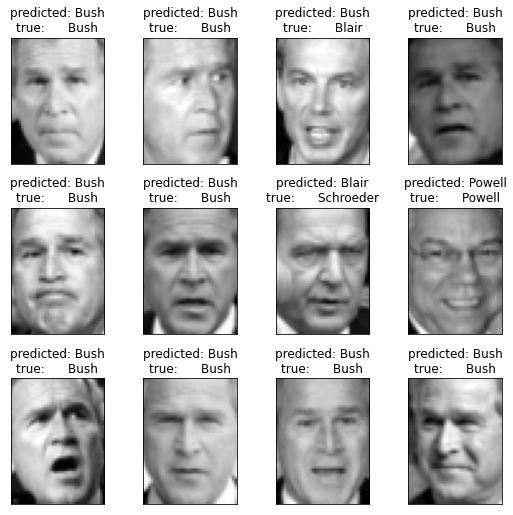

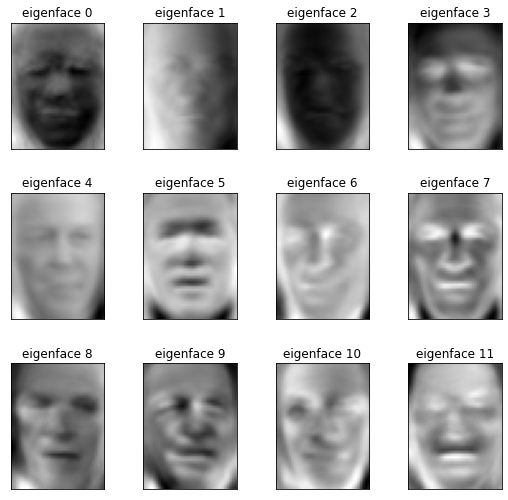

In [4]:
prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

# plot the gallery of the most significative eigenfaces

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

## multilayer perceptron (having two hidden layers with 15 and 10 neurons respectively)

In [5]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15, 10), random_state=1)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.40372670807453415


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [6]:
print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

                   precision    recall  f1-score   support

     Ariel Sharon       0.00      0.00      0.00        13
     Colin Powell       0.23      0.40      0.29        60
  Donald Rumsfeld       0.00      0.00      0.00        27
    George W Bush       0.48      0.73      0.58       146
Gerhard Schroeder       0.00      0.00      0.00        25
      Hugo Chavez       0.00      0.00      0.00        15
       Tony Blair       0.00      0.00      0.00        36

         accuracy                           0.40       322
        macro avg       0.10      0.16      0.13       322
     weighted avg       0.26      0.40      0.32       322

[[  0   3   0  10   0   0   0]
 [  0  24   0  36   0   0   0]
 [  0  10   0  17   0   0   0]
 [  0  40   0 106   0   0   0]
 [  0   7   0  18   0   0   0]
 [  0   3   0  12   0   0   0]
 [  0  16   0  20   0   0   0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


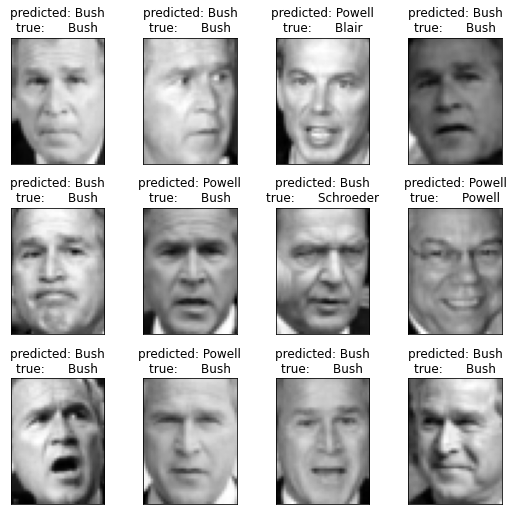

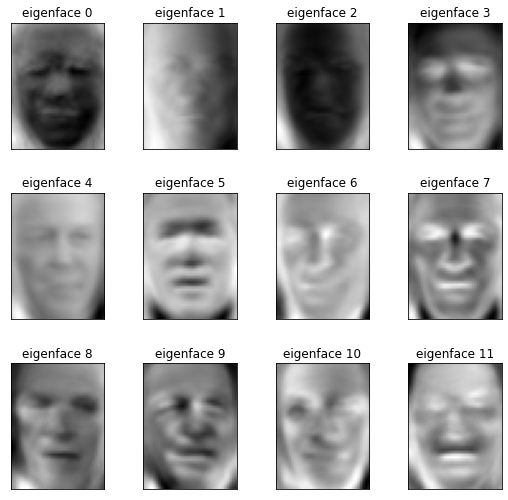

In [7]:
prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

# plot the gallery of the most significative eigenfaces

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

##  Deep convolutional neural network using the Keras or TensorFlow library

In [8]:
!pip install skorch

     |████████████████████████████████| 155 kB 8.7 MB/s 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: DeprecationWarning: CVSplit is deprecated, use the new name ValidSplit instead
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

done in 60.694s
                   precision    recall  f1-score   support

     Ariel Sharon       0.69      0.85      0.76        13
     Colin Powell       1.00      0.95      0.97        60
  Donald Rumsfeld       0.96      0.85      0.90        27
    George W Bush       0.95      0.97      0.96       146
Gerhard Schroeder       0.82      0.56      0.67        25
      Hugo Chavez       0.71      0.80      0.75        15
       Tony Blair       0.73      0.83      0.78        36

         accuracy                           0.90       322
        macro avg       0.84      0.83      0.83       322
     weighted avg       0.90      0.90      0.90       322



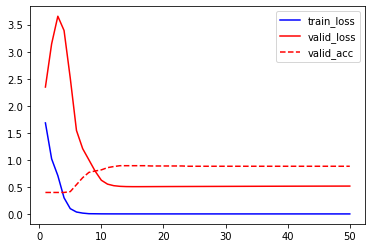

In [9]:
# Pytorch Models
import numpy as np
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from skorch import NeuralNetClassifier
import skorch

# Preprocesing
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
class Resnet18(nn.Module):
    """ResNet 18, pretrained, with one input chanel and 7 outputs."""

    def __init__(self, in_channels=1, n_outputs=7):
        super(Resnet18, self).__init__()

        # self.model = torchvision.models.resnet18()
        self.model = torchvision.models.resnet18(pretrained=True)

        # original definition of the first layer on the renset class
        # self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3,
        #                        bias=False)
        # one channel input (greyscale):
        self.model.conv1 = nn.Conv2d(in_channels, 64, kernel_size=7, stride=2,
                                     padding=3, bias=False)

        # Last layer
        num_ftrs = self.model.fc.in_features
        self.model.fc = nn.Linear(num_ftrs, n_outputs)

    def forward(self, x):
        return self.model(x)


torch.manual_seed(0)
resnet = NeuralNetClassifier(
    Resnet18,
    # `CrossEntropyLoss` combines `LogSoftmax and `NLLLoss`
    criterion=nn.CrossEntropyLoss,
    max_epochs=50,
    batch_size=128,  # default value
    optimizer=torch.optim.Adam,
    # optimizer=torch.optim.SGD,
    optimizer__lr=0.001,
    optimizer__betas=(0.9, 0.999),
    optimizer__eps=1e-4,
    optimizer__weight_decay=0.0001,  # L2 regularization
    # Shuffle training data on each epoch
    # iterator_train__shuffle=True,
    train_split=skorch.dataset.CVSplit(cv=5, stratified=True),
    device=device,
    verbose=0)

scaler = preprocessing.MinMaxScaler()
X_train_s = scaler.fit_transform(X_train).reshape(-1, 1, h, w)
X_test_s = scaler.transform(X_test).reshape(-1, 1, h, w)

t0 = time()
resnet.fit(X_train_s, y_train)
print("done in %0.3fs" % (time() - t0))

# Continue training a model (warm re-start):
# resnet.partial_fit(X_train_s, y_train)

y_pred = resnet.predict(X_test_s)
print(classification_report(y_test, y_pred, target_names=target_names))

epochs = np.arange(len(resnet.history[:, 'train_loss'])) + 1
plt.plot(epochs, resnet.history[:, 'train_loss'], '-b', label='train_loss')
plt.plot(epochs, resnet.history[:, 'valid_loss'], '-r', label='valid_loss')
plt.plot(epochs, resnet.history[:, 'valid_acc'], '--r', label='valid_acc')
plt.legend()
plt.show()

## clustering method

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


[-1  0]
[   2 2061]


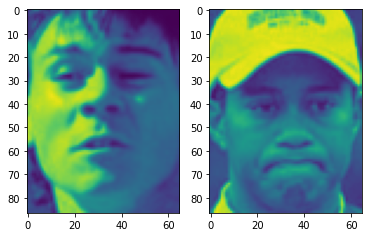

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans 
from sklearn.cluster import AgglomerativeClustering
import numpy as np
###1. Load the face datasets
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]
X_people = X_people / 255
pca=PCA(n_components=100)
pca.fit_transform(X_people)
X_pca=pca.transform(X_people)
 
###2.1 We Apply DBScan 
dbscan=DBSCAN(min_samples=3, eps=15)
labels=dbscan.fit_predict(X_pca)
print(np.unique(labels))
#[-1  0] 
###Meaning that we have nly one single cluster with noise data point here
####Now we count number of points in all clusters and noise to see excatly what it looks like
print(np.bincount(labels+1))
#[   2 2061]
###We have only two noise points here, labeled with "-1" in the array. We can plot them
noise = X_people[labels==-1]
fig,axes=plt.subplots(1,2)
for image, ax in zip(noise,axes.ravel()):
    ax.imshow(image.reshape(image_shape),vmin=0,vmax=1)
plt.show()


eps=1
Number of clusters: [-1]
Clusters: [2063]

eps=3
Number of clusters: [-1]
Clusters: [2063]

eps=5
Number of clusters: [-1]
Clusters: [2063]

eps=7
Number of clusters: [-1  0  1  2]
Clusters: [1732  324    4    3]

eps=9
Number of clusters: [-1  0  1  2  3]
Clusters: [ 697 1357    3    3    3]

eps=11
Number of clusters: [-1  0]
Clusters: [ 149 1914]

eps=13
Number of clusters: [-1  0]
Clusters: [  15 2048]


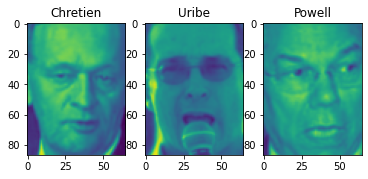

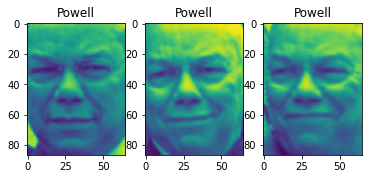

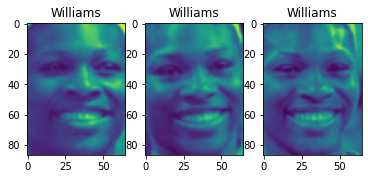

In [11]:
###This kind of analysis, trying to find “the odd one out”, is called outlier detection.
###We can guess why these two photos are noise data: one with hat, and the other one is too close
 
###2.2 We can adjust our eps to see more change, with "-1" labeling the noise data points
for eps in [1,3,5,7,9,11,13]:
    print("\neps=%d" % eps)
    dbscan = DBSCAN(eps=eps, min_samples=3)
    labels = dbscan.fit_predict(X_pca)
    print("Number of clusters: %s" % np.unique(labels))
    print("Clusters: %s" % np.bincount(labels + 1))
###eps=1
###Number of clusters: [-1]
###Clusters: [2063]###
 
###eps=3
###Number of clusters: [-1]
###Clusters: [2063]###
 
###eps=5
###Number of clusters: [-1]
###Clusters: [2063]###
 
###eps=7
###Number of clusters: [-1  0  1  2]
###Clusters: [1733  323    4    3]###
 
###eps=9
###Number of clusters: [-1  0  1  2  3]
###Clusters: [ 694 1360    3    3    3]###
 
###eps=11
###Number of clusters: [-1  0]
###Clusters: [ 148 1915]###
 
###eps=13
###Number of clusters: [-1  0]
###Clusters: [  15 2048]
 
###2.3 Again we can see the core points with eps of 9 within the three small clusters 
dbscan = DBSCAN(min_samples=3, eps=9)
labels = dbscan.fit_predict(X_pca)
for cluster in range(max(labels)):
    mask = labels == cluster
    n_images =  np.sum(mask)
    fig, axes = plt.subplots(1, 3)
    for image, label, ax in zip(X_people[mask], y_people[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1])
plt.show()

cluster sizes k-Means: [258 207 221 167 225 181 221 167 154 262]


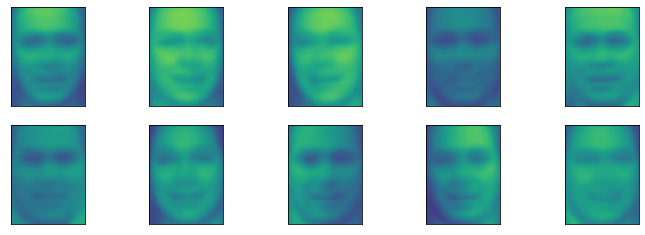

In [12]:
###We can observe that some of the clusters correspond to people with very distinct faces 
 
###3.1 Apply K-means
###Agglomerative clustering and k-Means are much more likely to create clusters of even size, 
###but we do need to set a number of clusters.
n_clusters = 10
# extract clusters with k-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
labels_km = kmeans.fit_predict(X_pca)
print("cluster sizes k-Means: %s" % np.bincount(labels_km))
###[219 240 154 216 240 228 229 201 158 178]
 
###Visualize the cluster centers. As we clustered in the representation produced by PCA, 
###we need to rotate the cluster centers, using pca.inverse_transform
fig, axes = plt.subplots(2, 5, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(12, 4))
for center, ax in zip(kmeans.cluster_centers_, axes.ravel()):
    ax.imshow(pca.inverse_transform(center).reshape(image_shape), vmin=0, vmax=1)
plt.show()

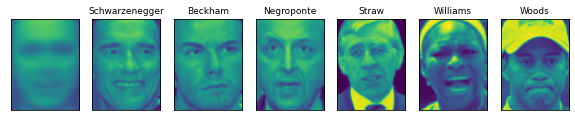

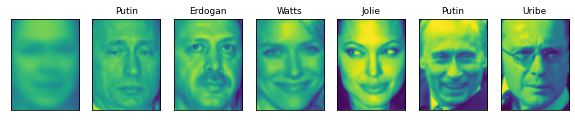

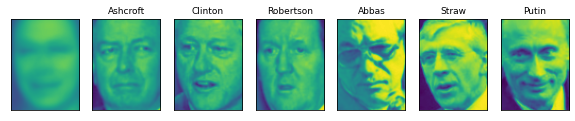

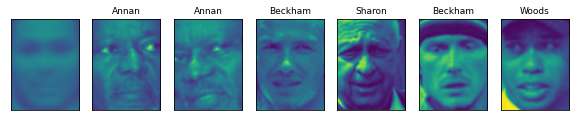

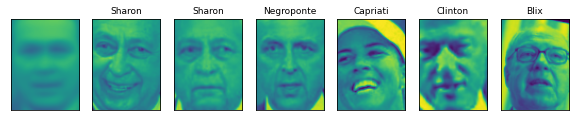

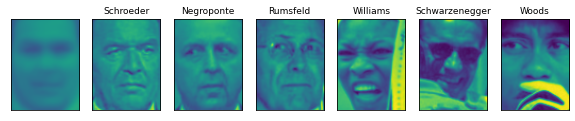

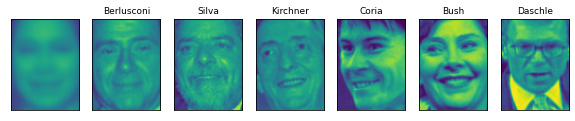

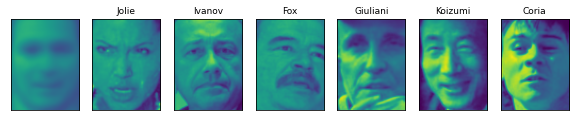

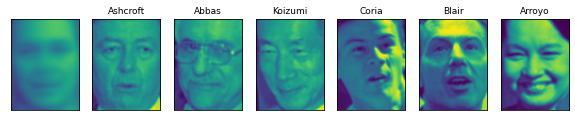

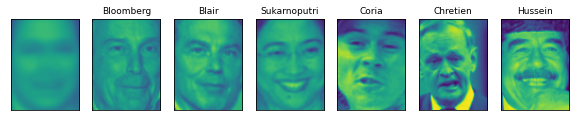

In [13]:
###3.2 the result is promising for kmeans, but we might want a more detialed outcome
###Below we show the cluster center, three most typical photos in the cluster 
###and three most atypical images in the cluster
n_clusters = 10
for cluster in range(n_clusters):
    center = kmeans.cluster_centers_[cluster]
    mask = kmeans.labels_ == cluster
    dists = np.sum((X_pca - center) ** 2, axis=1)
    dists[~mask] = np.inf
    inds = np.argsort(dists)[:3]
    dists[~mask] = -np.inf
    inds = np.r_[inds, np.argsort(dists)[-3:]]
    fig, axes = plt.subplots(1, 7, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(10, 8))
    axes[0].imshow(pca.inverse_transform(center).reshape(image_shape), vmin=0, vmax=1)
    for image, label, asdf, ax in zip(X_people[inds], y_people[inds], labels_km[inds], axes[1:]):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title("%s" % (people.target_names[label].split()[-1]), fontdict={'fontsize': 9})
plt.show()
 
###show three of them here only, and the result is quite straightforward

cluster sizes agglomerative clustering: [138 334 249 199 220 232 128 222 184 157]


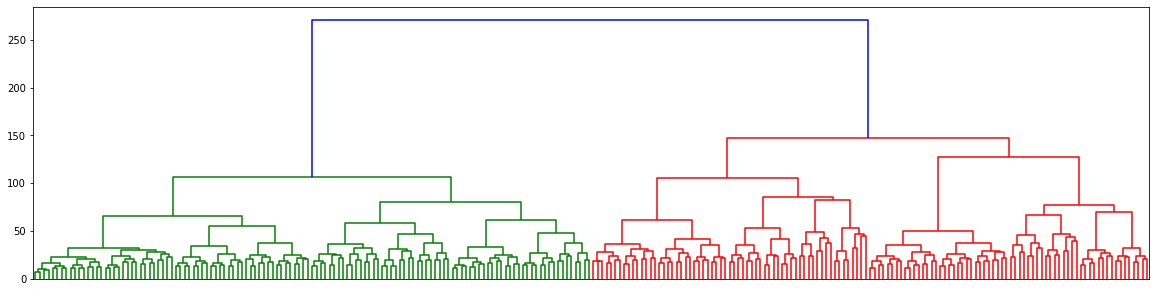

In [14]:
###4.1 Agglomerative clustering. We desing the clusters with the method of kmeans
agglomerative = AgglomerativeClustering(n_clusters=10)
labels_agg = agglomerative.fit_predict(X_pca)
print("cluster sizes agglomerative clustering: %s" % np.bincount(labels_agg))
###cluster sizes agglomerative clustering: [315 268 180 279 302 194 191 129 121  84]
 
###4.2 plot the according dendogram
from scipy.cluster.hierarchy import dendrogram, ward
linkage_array = ward(X_pca)
plt.figure(figsize=(20, 5))
dendrogram(linkage_array, p=7, truncate_mode='level', no_labels=True)
plt.show()

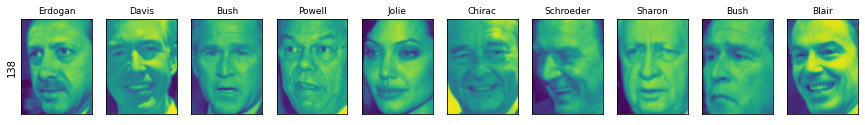

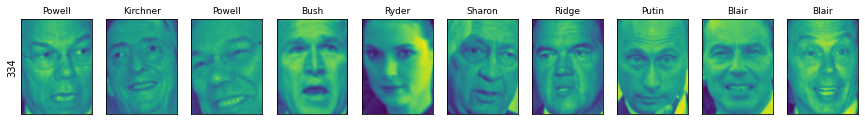

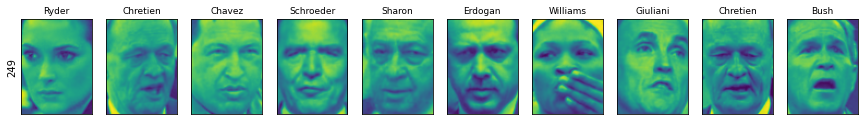

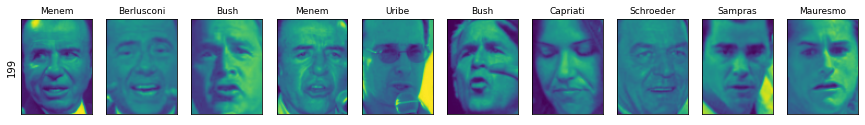

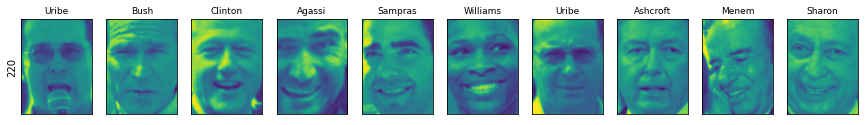

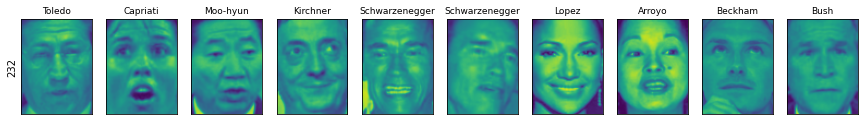

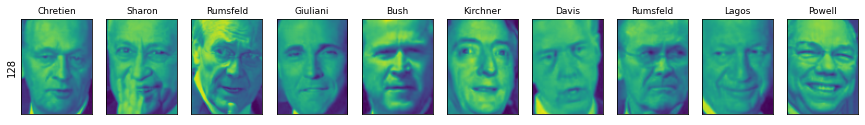

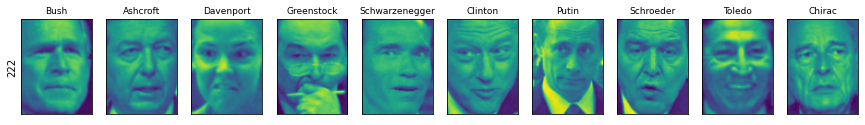

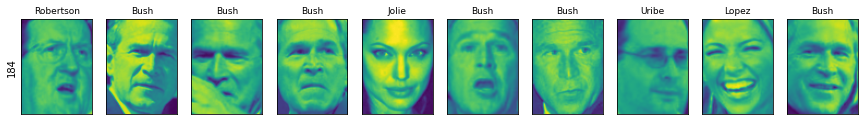

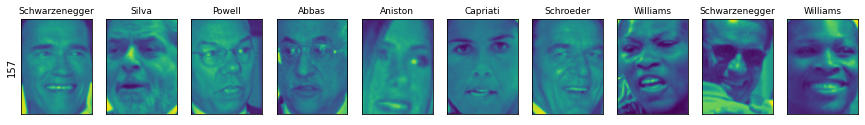

In [15]:
###4.3 We plot the cluster centers
n_clusters = 10
for cluster in range(n_clusters):
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 10, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(15, 8))
    axes[0].set_ylabel(np.sum(mask))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask], labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title("%s" % people.target_names[label].split()[-1], fontdict={'fontsize': 9})
plt.show()